<a href="https://colab.research.google.com/github/joyamp/Carcatarea/blob/main/ORB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install opencv-python==4.2.0.34 opencv-contrib-python==4.2.0.34

In [27]:
!git clone https://github.com/joyamp/Carcatarea.git
%cd /content/Carcatarea

fatal: destination path 'Carcatarea' already exists and is not an empty directory.
/content/Carcatarea


(-0.5, 89.5, 89.5, -0.5)

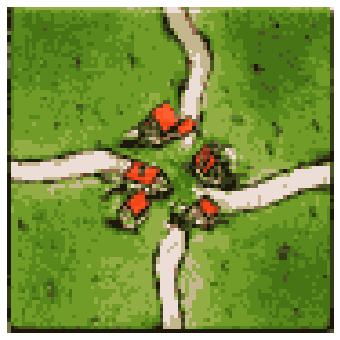

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# directorio que contiene las imágenes de referencia
dir_path = 'Carcatarea/TileAssets'
img_path = 'Carcatarea/TileAssets/4G5R.PNG'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# visualizar imagen
fig = plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')

In [34]:
#Funcion para extraer keypoint y descriptores de todas las cartas

def Getlist_Keypoints_ORB(dir_path):
  import os
  img_list = os.listdir(dir_path)
  ref_imgs, ref_names = [], []

# por cada imagen .png en img_list
  for filename in img_list:
    img_name, _ = os.path.splitext(filename)
    img_path = os.path.join(dir_path, filename)
    img = cv2.imread(img_path)
    ref_imgs.append(img)
    ref_names.append(img_name)

  # inicializar orb detector
  orb=cv2.ORB_create()

  ref_features = []
  for img in ref_imgs:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # computar keypoint y descritores
    kps, des = orb.detectAndCompute(gray, None)
 
    if len(kps) != 0:
      # agregar a lista
      ref_features.append( (kps, des) )
  
  return ref_features,ref_imgs,ref_names


In [35]:

def ORB_kps_des(img):
  orb=cv2.ORB_create()
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kps, des = orb.detectAndCompute(gray, mask=None)
  return kps,des

In [36]:
def Matcher(kps,des,ref_features):
  # inicializar BruteForce Matcher
  # con criterio de distancia euclidiana, cv2.NORM_L2
  BruteForce = cv2.BFMatcher(normType=cv2.NORM_L2)

  # inicilizar lista que contendrá la cantida de coincidencias
  items=len(ref_features)
  ref_votes = np.zeros( (items, ) )

  # para cada carta de referencia
  for i, feature in enumerate( ref_features ):
    # extraer keypoints y descriptores
    kps_ref, des_ref = feature

    # para cada decriptor de img_01.jpg, encontrar los 2 mejores matches
    # con respecto a los descriptores de las cartas de referencia
    matches = BruteForce.knnMatch(des, des_ref, k=2)

    # por cada par de matches (match_1, match_2) obtenido
    # para cada descriptor en des_ref
    for match_1, match_2 in matches:

      # aplicar ratio test para filtrar matches
      ratio = 0.5
      if match_1.distance < ratio*match_2.distance:
        # agregar voto de match válido
        ref_votes[i] += 1
  
  return ref_votes



In [37]:
ref_features,ref_imgs,ref_names=Getlist_Keypoints_ORB(dir_path)
kps,des=ORB_kps_des(img)
ref_votes=Matcher(kps,des,ref_features)

# ------------------------------------------------------------------------------
# print cantidad de votos
print('cantidad de votos:\n', ref_votes)

# obtener carta de coincidencia y probabilidad
ref_idx = np.argmax(ref_votes)
proba = ref_votes[ref_idx]/np.sum(ref_votes)

# print resultado
name = ref_names[ref_idx]
print('\n{:10s} {:2.1f}%'.format(name, proba*100))

cantidad de votos:
 [12.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]

4G5R       50.0%
